<a href="https://colab.research.google.com/github/J-o-y-y/ms_ai_school/blob/main/20230627_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%8B%9C%EA%B0%81%ED%99%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 공개되어 있는 데이터를 가지고 로지스틱 회귀 진행 실습

#- 각 이미지 크기는 28 x 28 / 흑백 이미지 / 총 10개의 클래스
"""
Fashion-MNIST 라벨 구성 요소
0 - 티셔츠
1 - 바지
2 - 스웨터
3 - 드레스
4 - 코트
5 - 샌들
6 - 셔츠
7 - 운동화
8 - 가방
9 - 앵글 부츠
"""

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [9]:
import torchvision.datasets as dataset

In [11]:
### 데이터셋 다운로드 하고 Dataloader 생성하기
# 데이터셋 다운로드 및 Dataloader 생성
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(),download=True)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(),download=False)


100%|██████████| 26421880/26421880 [00:01<00:00, 16647908.38it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301943.89it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5561873.17it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18940593.85it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [12]:
# train Loader test Loader 설정
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)

In [13]:
### 모델 정의
class LogisticRegression(nn.Module) :
    def __init__(self, input_size, num_classes) :
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x) :
        out = self.linear(x)
        return out

In [14]:
### 하이퍼 파라미터 설정
input_size = 28 * 28
num_classes = 10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

In [15]:
### 모델, Loss, 옵티마이저 정의
model = LogisticRegression(input_size=input_size, num_classes=num_classes)
# print(model)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device >>" , device)

model.to(device)

Using Device >> cpu


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Epoch [1/10], Step [100/600], Loss : 1.4643, Train ACC : 0.6100
Epoch [1/10], Step [200/600], Loss : 1.1055, Train ACC : 0.6550
Epoch [1/10], Step [300/600], Loss : 0.9700, Train ACC : 0.6700
Epoch [1/10], Step [400/600], Loss : 0.9141, Train ACC : 0.6800
Epoch [1/10], Step [500/600], Loss : 0.9169, Train ACC : 0.6860
Epoch [1/10], Step [600/600], Loss : 0.8123, Train ACC : 0.6883
Epoch [2/10], Step [100/600], Loss : 0.8356, Train ACC : 0.6500
Epoch [2/10], Step [200/600], Loss : 0.7316, Train ACC : 0.7050
Epoch [2/10], Step [300/600], Loss : 0.6428, Train ACC : 0.7567
Epoch [2/10], Step [400/600], Loss : 0.7543, Train ACC : 0.7525
Epoch [2/10], Step [500/600], Loss : 0.7402, Train ACC : 0.7580
Epoch [2/10], Step [600/600], Loss : 0.6638, Train ACC : 0.7683
Epoch [3/10], Step [100/600], Loss : 0.6864, Train ACC : 0.8100
Epoch [3/10], Step [200/600], Loss : 0.6863, Train ACC : 0.8100
Epoch [3/10], Step [300/600], Loss : 0.5950, Train ACC : 0.8100
Epoch [3/10], Step [400/600], Loss : 0.7

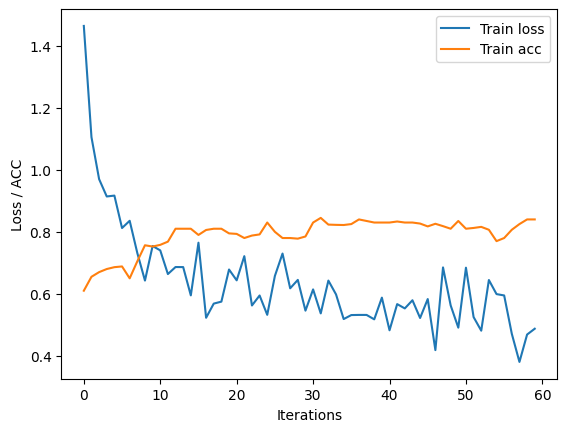

In [16]:
### train loop
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader) :
        # 데이터 로드
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # 순전파 및 Loss 계산
        ouptuts = model(images)
        loss = criterion(ouptuts, labels)

        # 역전파 및 가중치 업데이트
        loss.backward()
        optimizer.step()

        # 로그 출력
        if (i+1) % 100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(ouptuts.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)

            print("Epoch [{}/{}], Step [{}/{}], Loss : {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]))


# 손실 및 정확도 그래프 출력
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel('Iterations')
plt.ylabel('Loss / ACC')
plt.legend()
plt.show()

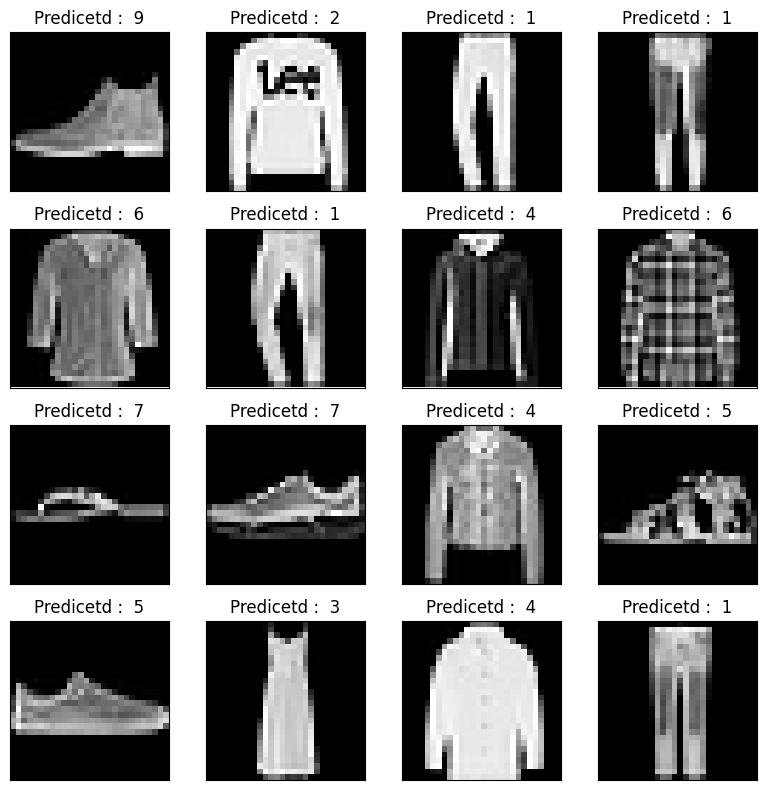

In [17]:
### 테스트 시각화
import numpy as np

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = 100, shuffle=False)
"""
batch_size 만큼 이미지가 넘어옴 16이상 으로 설정하시면됩니다.
"""

# 테스트 이미지 가져오기
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
images = images.reshape(-1, 28 * 28)

# 모델 예측
model.eval()
outputs_temp = model(images)
_, predicted_test = torch.max(outputs_temp.data,1)

# 이미지와 예측값 시각화
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat) :
    ax.imshow(np.squeeze(images[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicetd :  {predicted_test[i].item()}")

plt.tight_layout()
plt.show()